In this file, we check wether or not we can see some better results just by analysing the patients at the base line stage

In [1]:
import os
import sys
import pandas as pd
import datetime

import pathlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import importlib


from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import callbacks  

# project specific
sys.path.append('../src')
from utils import data_handler
from utils import benchmark
from utils import visualisation
from utils.models import vanilla_autoencoder


import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go



%load_ext tensorboard
!rm -rf ../workfiles/logs/

not applying any filtering over phases
retaining all patient who have at least passed the Base Line Visit...
['PPMI-Phase2-IR2.56706.BL.0003397555.5104-SL-4062.longRNA-NEBKAP.salmon-gtf.genes.sf', 'PPMI-Phase1-IR2.3519.BL.PP0015-9802.5104-SL-0208.longRNA-NEBKAP.salmon-gtf.genes.sf', 'PPMI-Phase1-IR2.3182.BL.PP0021-3818.5104-SL-1780.longRNA-NEBKAP.salmon-gtf.genes.sf', 'PPMI-Phase2-IR2.3377.BL.PP0015-6950.5104-SL-1366.longRNA-NEBKAP.salmon-gtf.genes.sf', 'PPMI-Phase1-IR2.3461.BL.PP0016-1614.5104-SL-0440.longRNA-NEBKAP.salmon-gtf.genes.sf', 'PPMI-Phase2-IR2.40755.BL.PP0047-8483.5104-SL-4282.longRNA-NEBKAP.salmon-gtf.genes.sf', 'PPMI-Phase1-IR2.60101.BL.PP0048-3478.5104-SL-2349.longRNA-NEBKAP.salmon-gtf.genes.sf', 'PPMI-Phase1-IR2.3771.BL.PP0012-9641.5104-SL-2099.longRNA-NEBKAP.salmon-gtf.genes.sf', 'PPMI-Phase2-IR2.3952.BL.PP0015-9689.5104-SL-0544.longRNA-NEBKAP.salmon-gtf.genes.sf', 'PPMI-Phase1-IR2.51782.BL.0001093220.5104-SL-0860.longRNA-NEBKAP.salmon-gtf.genes.sf', 'PPMI-Phase2-IR2.4

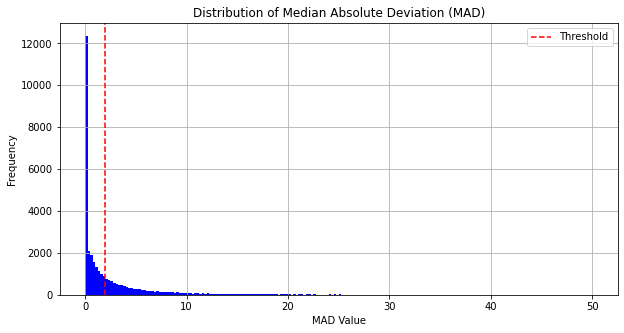

removing 22504 genes under the MAD threshold from the dataset
number of genes selected :  11764
log(1 + x) transformation...
scaling to [0, 1]...
number of seq in the dataset : 1521
keeping sample as is, no conversion to time series


In [2]:
importlib.reload(data_handler) # to allow modification of the script without restarting the whole session

x_train, filenames, n_genes, gene_names = data_handler.generate_dataset(
    feature_selection_threshold = 2, 
    retain_phases = None, 
    normalization = False,
    as_time_series = False,
    log1p = True,
    MT_removal = True,
    min_max = True,
    keep_only_BL = True)

In [3]:
importlib.reload(vanilla_autoencoder) # to allow modification of the script without restarting the whole session

latent_dim = 32

t_shape = (n_genes)

autoencoder = vanilla_autoencoder.generate_model(t_shape, latent_dim)
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [4]:
checkpoint_filepath = '../workfiles/simple_ae/checkpoint'
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='loss',
    mode='min',
    save_best_only=True)


reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=20, min_lr=0.00001)

early_stopping_callback = callbacks.EarlyStopping(monitor='loss', patience=50)


log_dir = "../workfiles/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

cb = [model_checkpoint_callback, reduce_lr, early_stopping_callback, tensorboard_callback]

In [5]:
hist = autoencoder.fit(x_train, epochs=1000, callbacks=cb) # around 16 hours for transcripts dataset 


Epoch 1/1000


2023-09-13 19:43:34.323371: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


24/24 [==============================] - 12s 442ms/step - loss: 0.0292 - lr: 0.0010
Epoch 2/1000
24/24 [==============================] - 10s 440ms/step - loss: 0.0172 - lr: 0.0010
Epoch 3/1000
24/24 [==============================] - 10s 447ms/step - loss: 0.0161 - lr: 0.0010
Epoch 4/1000
24/24 [==============================] - 11s 471ms/step - loss: 0.0131 - lr: 0.0010
Epoch 5/1000
24/24 [==============================] - 11s 452ms/step - loss: 0.0126 - lr: 0.0010
Epoch 6/1000
24/24 [==============================] - 10s 448ms/step - loss: 0.0125 - lr: 0.0010
Epoch 7/1000
24/24 [==============================] - 10s 439ms/step - loss: 0.0121 - lr: 0.0010
Epoch 8/1000
24/24 [==============================] - 10s 428ms/step - loss: 0.0122 - lr: 0.0010
Epoch 9/1000
24/24 [==============================] - 10s 423ms/step - loss: 0.0118 - lr: 0.0010
Epoch 10/1000
24/24 [==============================] - 10s 436ms/step - loss: 0.0114 - lr: 0.0010
Epoch 11/1000
24/24 [=====================

IOStream.flush timed out


24/24 [==============================] - 47s 2s/step - loss: 0.0034 - lr: 1.0000e-05
Epoch 880/1000
24/24 [==============================] - 28s 1s/step - loss: 0.0034 - lr: 1.0000e-05
Epoch 881/1000
24/24 [==============================] - 24s 1s/step - loss: 0.0034 - lr: 1.0000e-05
Epoch 882/1000
24/24 [==============================] - 22s 929ms/step - loss: 0.0034 - lr: 1.0000e-05
Epoch 883/1000
24/24 [==============================] - 22s 954ms/step - loss: 0.0034 - lr: 1.0000e-05
Epoch 884/1000
24/24 [==============================] - 24s 1s/step - loss: 0.0034 - lr: 1.0000e-05
Epoch 885/1000
24/24 [==============================] - 22s 954ms/step - loss: 0.0034 - lr: 1.0000e-05
Epoch 886/1000
24/24 [==============================] - 24s 1s/step - loss: 0.0034 - lr: 1.0000e-05
Epoch 887/1000
24/24 [==============================] - 25s 1s/step - loss: 0.0034 - lr: 1.0000e-05
Epoch 888/1000
24/24 [==============================] - 19s 804ms/step - loss: 0.0034 - lr: 1.0000e-05
Epo

Keeping in mind that outputting a constant solution for every observation yields a loss value of ~0.2 for MT removed, log1p transformed dataset.

In [6]:
autoencoder.load_weights(checkpoint_filepath)


benchmarking model : vanilla_autoencoder
number of parametters of the model: 25423424
shape of the dataset: (1521, 11764)
the dataset meets the min_max requirement
loss: 0.0032732196
this is the first entry to the benchmark history


,model_name,param_count,loss,obs_count,gene_number
0,vanilla_autoencoder,25423424,0.003273,1521,11764


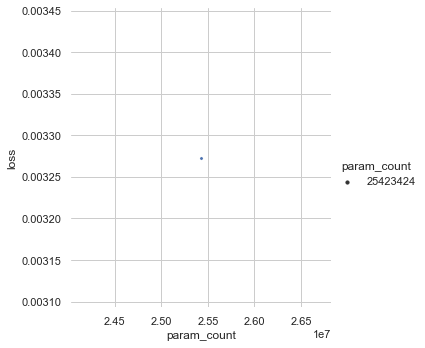

In [7]:
importlib.reload(benchmark) # to allow modification of the script without restarting the whole session
benchmark.benchmark(autoencoder, x_train)

[0.02248963713645935, 0.017068205401301384, 0.015111301094293594, 0.012964010238647461, 0.012669156305491924, 0.012384986504912376, 0.012116148136556149, 0.01204021368175745, 0.011644642800092697, 0.011279325000941753, 0.011041468009352684, 0.010955115780234337, 0.010821504518389702, 0.010736416094005108, 0.010474411770701408, 0.010918851010501385, 0.010633852332830429, 0.010287249460816383, 0.010211539454758167, 0.010207227431237698, 0.009831744246184826, 0.009725493378937244, 0.009609268978238106, 0.009708027355372906, 0.009448806755244732, 0.009209256619215012, 0.00927519891411066, 0.009279592894017696, 0.009097954258322716, 0.009039929136633873, 0.009130281396210194, 0.008901295252144337, 0.008921517990529537, 0.008956097066402435, 0.008712426759302616, 0.008713564835488796, 0.008658815175294876, 0.00865658838301897, 0.008789531886577606, 0.008552410639822483, 0.00854482315480709, 0.008319194428622723, 0.008315568789839745, 0.008350048214197159, 0.00867088045924902, 0.0086269788444

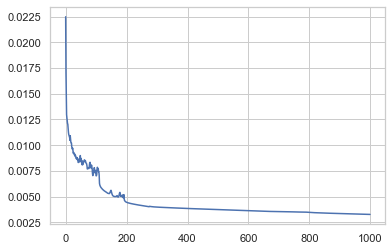

In [8]:
plt.plot(hist.history['loss'])
print(hist.history['loss'])




### some diagnosis

In [9]:
importlib.reload(visualisation) # to allow modification of the script without restarting the whole session
visualisation.plot_single_obs_processing(x_train, autoencoder)

In [10]:
autoencoder.encoder.save('../workfiles/simple_ae')
autoencoder.decoder.save('../workfiles/decoder_simple_ae')


INFO:tensorflow:Assets written to: ../workfiles/simple_ae/assets


INFO:tensorflow:Assets written to: ../workfiles/simple_ae/assets


INFO:tensorflow:Assets written to: ../workfiles/decoder_simple_ae/assets


INFO:tensorflow:Assets written to: ../workfiles/decoder_simple_ae/assets


In [11]:
compressed_dataframe = autoencoder.encoder.predict(x_train)

24/24 [==============================] - 0s 11ms/step


In [12]:
df = pd.DataFrame(compressed_dataframe)
df["name"] = filenames

48/48 [==============================] - 0s 6ms/step


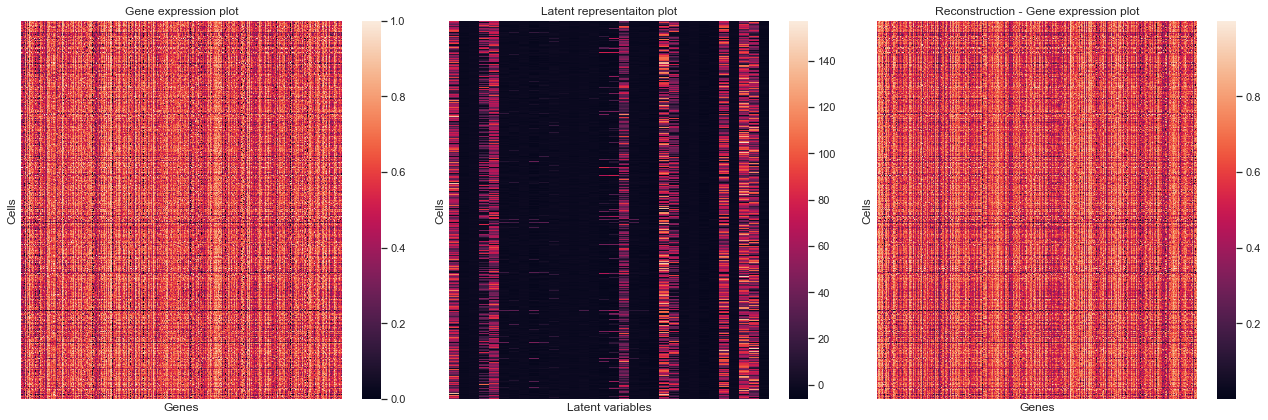

In [13]:
importlib.reload(visualisation) # to allow modification of the script without restarting the whole session
visualisation.plot_dataset_processing(x_train, autoencoder)

## If we are happy with the visualisation we can proceed to save the encoded dataset

In [14]:
df.to_csv("../workfiles/baseline_analysis_"+x_train._name+".csv", index=False)
